# Credit Card Ap

In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from intro_Data import *
%matplotlib inline

In [307]:
data = pd.read_csv('cc_approvals.data',header=None)

In [308]:
attribute = ['A'+str(i+1) for i in range(len(data.columns))]

In [309]:
data.columns = attribute

In [310]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [312]:
data['A16'] = data['A16'].apply(lambda x: 1 if x=='+' else 0)

In [313]:
for columns in data.columns:
    data[columns] = data[columns].apply(lambda x: np.nan if x=='?' else x)

In [314]:
data['A2'] = data['A2'].astype('float64')
data['A8'] = data['A8'].astype('float64')
data['A14'] = data['A14'].astype('float64')

In [315]:
for columns in data.columns:
    print(columns,'has',data[columns].nunique(),'unique values')

A1 has 2 unique values
A2 has 349 unique values
A3 has 215 unique values
A4 has 3 unique values
A5 has 3 unique values
A6 has 14 unique values
A7 has 9 unique values
A8 has 132 unique values
A9 has 2 unique values
A10 has 2 unique values
A11 has 23 unique values
A12 has 2 unique values
A13 has 3 unique values
A14 has 170 unique values
A15 has 240 unique values
A16 has 2 unique values


In [316]:
mask = np.triu(corr_matrix)
cols = ['A2','A3','A8','A11','A14','A15']
corr_matrix = data[cols].corr()

<AxesSubplot:>

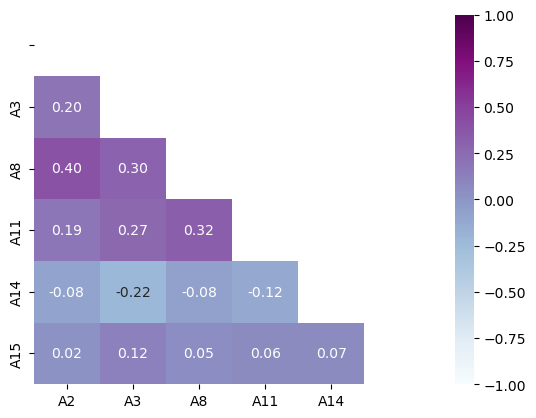

In [317]:
sns.heatmap(corr_matrix,mask=mask,annot=True,cmap='BuPu',vmin=-1,vmax=1,
           fmt='.2f',xticklabels=cols[:-1],yticklabels=['']+cols[1:])

Numerical values don't seem to have any strong linear correlation.

<AxesSubplot:>

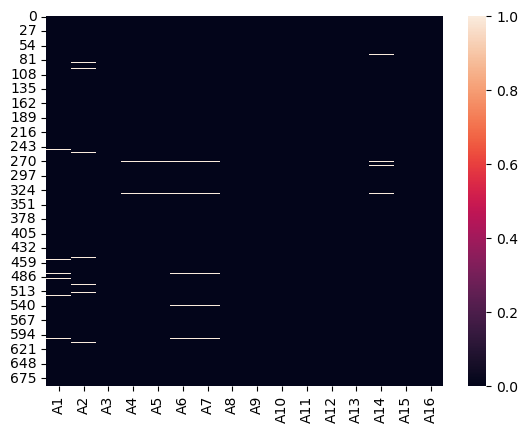

In [318]:
sns.heatmap(data.isnull())

In [320]:
for columns in cols:
    median = np.nanmedian(data[columns])
    data[columns] = data[columns].apply(lambda x: median if pd.isnull(x) else x)

In [322]:
for columns in data.columns:
    print(columns,'has',data[columns].isnull().sum(),'missing values')

A1 has 12 missing values
A2 has 0 missing values
A3 has 0 missing values
A4 has 6 missing values
A5 has 6 missing values
A6 has 9 missing values
A7 has 9 missing values
A8 has 0 missing values
A9 has 0 missing values
A10 has 0 missing values
A11 has 0 missing values
A12 has 0 missing values
A13 has 0 missing values
A14 has 0 missing values
A15 has 0 missing values
A16 has 0 missing values


We will drop other missing values as we cannot infer anything about them.

In [326]:
data = data.dropna()

In [328]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [352]:
feature = data.drop('A16',axis=1)
target = data['A16']

In [353]:
feature.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


Create dummy variables for categorical data

In [354]:
A1 = pd.get_dummies(feature['A1'],drop_first=True)
A4 = pd.get_dummies(feature['A4'],drop_first=True)
A5 = pd.get_dummies(feature['A5'],drop_first=True)
A6 = pd.get_dummies(feature['A6'],drop_first=True)
A7 = pd.get_dummies(feature['A7'],drop_first=True)
A9 = pd.get_dummies(feature['A9'],drop_first=True)
A10 = pd.get_dummies(feature['A10'],drop_first=True)
A12 = pd.get_dummies(feature['A12'],drop_first=True)
A13 = pd.get_dummies(feature['A13'],drop_first=True)

In [355]:
dummy_col = ['A1','A4','A5','A6','A7','A9','A10','A12','A13']
feature = feature.drop(dummy_col,axis=1)

In [356]:
feature = pd.concat([feature,A1,A4,A5,A6,A7,A9,A10,A12,A13],axis=1)

In [357]:
feature.head()

,A2,A3,A8,A11,A14,A15,b,u,y,gg,...,j,n,o,v,z,t,t,t,p,s
0,30.83,0.000,1.25,1,202.0,0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1,58.67,4.460,3.04,6,43.0,560,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,24.50,0.500,1.50,0,280.0,824,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,27.83,1.540,3.75,5,100.0,3,1,1,0,0,...,0,0,0,1,0,1,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


# Now we are ready to model our data

In [360]:
X = feature.copy().values
y = target.copy().values

In [367]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [362]:
dtree = DecisionTreeClassifier()

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [364]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [372]:
print('Single Decision Tree Train Score:',dtree.score(X_train,y_train))
print('Single Decision Tree Test Score:',dtree.score(X_test,y_test))

Single Decision Tree Train Score: 1.0
Single Decision Tree Test Score: 0.8267326732673267


### Random Forest Classifier

In [393]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [374]:
rfc = RandomForestClassifier()

In [381]:
param_grid = dict(n_estimators=[1,100,500],min_samples_split=[i for i in range(4,10)],
                max_depth=[i for i in range(4,10)])

In [382]:
grid = GridSearchCV(rfc,param_grid,scoring='accuracy',cv=5)

In [383]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_split': [4, 5, 6, 7, 8, 9],
                         'n_estimators': [1, 100, 500]},
             scoring='accuracy')

In [387]:
print('Best Hyperparameters:',grid.best_params_)
print('Best Score:',grid.best_score_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100}
Best Score: 0.8690768380320619


In [390]:
results = pd.DataFrame(grid.cv_results_)[['param_n_estimators','param_max_depth',
                                         'param_min_samples_split','mean_test_score','rank_test_score']]

In [391]:
results[results['rank_test_score']==1]

,param_n_estimators,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
19,100,5,4,0.869077,1


We found the best parameter.

In [392]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=4)

In [396]:
train_score, test_score = do_Kfold(rfc,X,y,k=10)

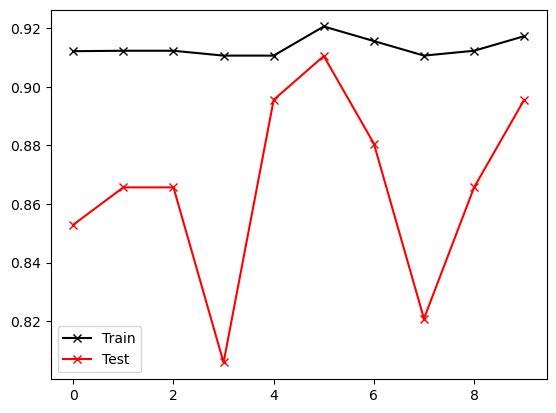

In [405]:
plt.plot(train_score,'-xk',label='Train')
plt.plot(test_score,'-xr',label='Test')
plt.legend()
plt.show()

In [402]:
print('Average Train Score w/ Optimal Hyperparameters:',np.mean(train_score))
print('Average Test Score w/ Optimal Hyperparameters:',np.mean(test_score))

Average Train Score w/ Optimal Hyperparameters: 0.9133960440622495
Average Test Score w/ Optimal Hyperparameters: 0.865891132572432


### Logistic Regression

In [407]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [410]:
scaler = StandardScaler()

In [411]:
log_reg = LogisticRegression()

In [412]:
train_score, test_score = do_Kfold(log_reg,X,y,k=10,scaler=scaler)

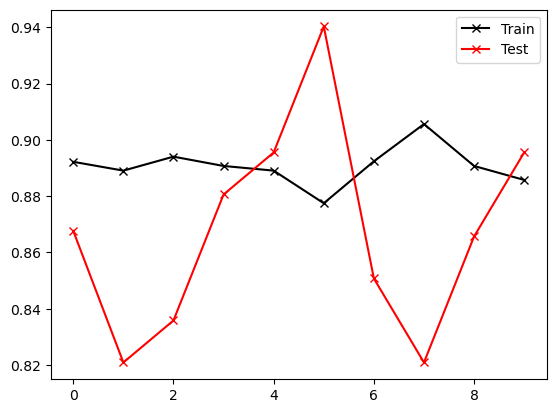

In [413]:
plt.plot(train_score,'-xk',label='Train')
plt.plot(test_score,'-xr',label='Test')
plt.legend()
plt.show()

In [414]:
print('Average Train Score w/ Optimal Hyperparameters:',np.mean(train_score))
print('Average Test Score w/ Optimal Hyperparameters:',np.mean(test_score))

Average Train Score w/ Optimal Hyperparameters: 0.890710630072595
Average Test Score w/ Optimal Hyperparameters: 0.8673617208077262


### KNN

In [415]:
from sklearn.neighbors import KNeighborsClassifier

In [428]:
neighbor_range = range(100,200)
k = 5
train = []
test = []

for i in neighbor_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    train_score, test_score = do_Kfold(knn,X,y,k,scaler=scaler)
    train.append(np.mean(train_score))
    test.append(np.mean(test_score))

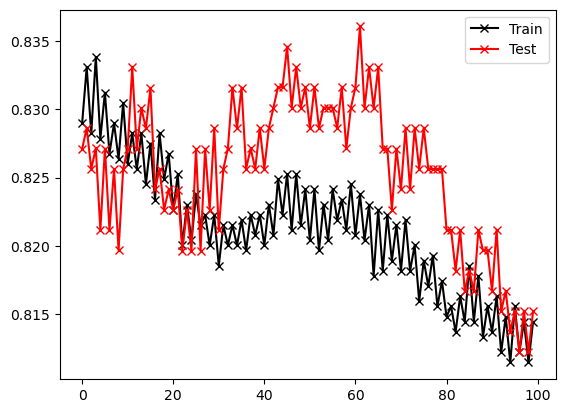

In [434]:
plt.plot(train,'-xk',label='Train')
plt.plot(test,'-xr',label='Test')
plt.legend()
plt.show()

In [432]:
print('Maximum Test Score:',np.max(test))
print('Number of neighbors:',np.argmax(test)+100)

Maximum Test Score: 0.8360641238253178
Number of neighbors: 161


In [435]:
knn = KNeighborsClassifier(n_neighbors=161)
train, test = do_Kfold(knn,X,y,k=10,scaler=scaler)

In [436]:
print('Average Train Score w/ n_neighbors = 161:',np.mean(train))
print('Average Test Score w/ n_neighbors = 161:',np.mean(test))

Average Train Score w/ n_neighbors = 161: 0.8226530152768168
Average Test Score w/ n_neighbors = 161: 0.8331650570676032


### Naive-Bayes

In [729]:
from sklearn.naive_bayes import MultinomialNB

In [730]:
mnb = MultinomialNB()

In [731]:
train, test = do_Kfold(mnb,X,y,k=10)

In [732]:
print('Average Train Score:',np.mean(train))
print('Average Test Score:',np.mean(test))

Average Train Score: 0.6749461851888461
Average Test Score: 0.6766022827041265


Produces bad accuracy because the features are not independent(?)

### Linear SVM

In [474]:
from sklearn.svm import LinearSVC

In [479]:
C = [1,0.1,0.01,0.001,0.0001,0.00001]

train_avg = []
test_avg = []

for i in C:
    svm = LinearSVC(max_iter = 10000, C = i)
    train, test = do_Kfold(svm,X,y,k=10,scaler=scaler)
    train_avg.append(np.mean(train))
    test_avg.append(np.mean(test))

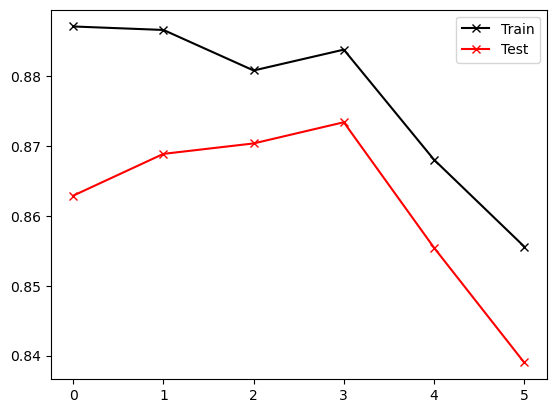

In [480]:
plt.plot(train_avg,'-xk',label='Train')
plt.plot(test_avg,'-xr',label='Test')
plt.legend()
plt.show()

We see the best result at C = 0.001

In [485]:
svm = LinearSVC(max_iter = 10000, C = 0.001)
train, test = do_Kfold(svm,X,y,k=10,scaler=scaler)

In [486]:
print('Average Train Score:',np.mean(train))
print('Average Test Score:',np.mean(test))

Average Train Score: 0.8837567131231261
Average Test Score: 0.8733757682177348


### Neural Network

In [708]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [709]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=146)

In [710]:
from sklearn.preprocessing import MinMaxScaler

In [711]:
mms = MinMaxScaler()

In [712]:
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [713]:
early_stopping = EarlyStopping(monitor='val_loss',patience=25,mode='min',verbose=1)

In [714]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [715]:
model.fit(X_train,y_train,batch_size=256,epochs=300,
          verbose=1,validation_data=(X_test,y_test),callbacks = [early_stopping])

Epoch 1/300
2/2 [==============================] - 0s 59ms/step - loss: 0.7744 - accuracy: 0.4925 - val_loss: 0.7037 - val_accuracy: 0.4208
Epoch 2/300
2/2 [==============================] - 0s 11ms/step - loss: 0.7451 - accuracy: 0.5011 - val_loss: 0.7001 - val_accuracy: 0.4208
Epoch 3/300
2/2 [==============================] - 0s 12ms/step - loss: 0.7190 - accuracy: 0.5458 - val_loss: 0.6967 - val_accuracy: 0.4257
Epoch 4/300
2/2 [==============================] - 0s 14ms/step - loss: 0.7336 - accuracy: 0.5075 - val_loss: 0.6937 - val_accuracy: 0.4307
Epoch 5/300
2/2 [==============================] - 0s 13ms/step - loss: 0.7420 - accuracy: 0.4648 - val_loss: 0.6909 - val_accuracy: 0.4356
Epoch 6/300
2/2 [==============================] - 0s 13ms/step - loss: 0.7195 - accuracy: 0.5245 - val_loss: 0.6885 - val_accuracy: 0.4802
Epoch 7/300
2/2 [==============================] - 0s 13ms/step - loss: 0.7252 - accuracy: 0.5267 - val_loss: 0.6863 - val_accuracy: 0.4802
Epoch 8/300
2/2 [===

2/2 [==============================] - 0s 10ms/step - loss: 0.6437 - accuracy: 0.6375 - val_loss: 0.6046 - val_accuracy: 0.8218
Epoch 60/300
2/2 [==============================] - 0s 11ms/step - loss: 0.6187 - accuracy: 0.7036 - val_loss: 0.6028 - val_accuracy: 0.8218
Epoch 61/300
2/2 [==============================] - 0s 11ms/step - loss: 0.6312 - accuracy: 0.6759 - val_loss: 0.6008 - val_accuracy: 0.8218
Epoch 62/300
2/2 [==============================] - 0s 13ms/step - loss: 0.6235 - accuracy: 0.6588 - val_loss: 0.5988 - val_accuracy: 0.8218
Epoch 63/300
2/2 [==============================] - 0s 11ms/step - loss: 0.6350 - accuracy: 0.6908 - val_loss: 0.5969 - val_accuracy: 0.8218
Epoch 64/300
2/2 [==============================] - 0s 12ms/step - loss: 0.6408 - accuracy: 0.6418 - val_loss: 0.5952 - val_accuracy: 0.8218
Epoch 65/300
2/2 [==============================] - 0s 12ms/step - loss: 0.6435 - accuracy: 0.6375 - val_loss: 0.5938 - val_accuracy: 0.8218
Epoch 66/300
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.5140 - accuracy: 0.7846 - val_loss: 0.4763 - val_accuracy: 0.8416
Epoch 118/300
2/2 [==============================] - 0s 10ms/step - loss: 0.4979 - accuracy: 0.7974 - val_loss: 0.4744 - val_accuracy: 0.8416
Epoch 119/300
2/2 [==============================] - 0s 12ms/step - loss: 0.5012 - accuracy: 0.7868 - val_loss: 0.4724 - val_accuracy: 0.8416
Epoch 120/300
2/2 [==============================] - 0s 11ms/step - loss: 0.5366 - accuracy: 0.7548 - val_loss: 0.4708 - val_accuracy: 0.8465
Epoch 121/300
2/2 [==============================] - 0s 11ms/step - loss: 0.4861 - accuracy: 0.7889 - val_loss: 0.4695 - val_accuracy: 0.8416
Epoch 122/300
2/2 [==============================] - 0s 11ms/step - loss: 0.5169 - accuracy: 0.7783 - val_loss: 0.4684 - val_accuracy: 0.8416
Epoch 123/300
2/2 [==============================] - 0s 11ms/step - loss: 0.5107 - accuracy: 0.7932 - val_loss: 0.4673 - val_accuracy: 0.8416
Epoch 124/300
2/2 [=

Epoch 175/300
2/2 [==============================] - 0s 10ms/step - loss: 0.4229 - accuracy: 0.8230 - val_loss: 0.4174 - val_accuracy: 0.8366
Epoch 176/300
2/2 [==============================] - 0s 10ms/step - loss: 0.4204 - accuracy: 0.8465 - val_loss: 0.4171 - val_accuracy: 0.8366
Epoch 177/300
2/2 [==============================] - 0s 12ms/step - loss: 0.4280 - accuracy: 0.8273 - val_loss: 0.4168 - val_accuracy: 0.8366
Epoch 178/300
2/2 [==============================] - 0s 11ms/step - loss: 0.4380 - accuracy: 0.8529 - val_loss: 0.4167 - val_accuracy: 0.8317
Epoch 179/300
2/2 [==============================] - 0s 11ms/step - loss: 0.4051 - accuracy: 0.8422 - val_loss: 0.4163 - val_accuracy: 0.8317
Epoch 180/300
2/2 [==============================] - 0s 10ms/step - loss: 0.4626 - accuracy: 0.7996 - val_loss: 0.4158 - val_accuracy: 0.8317
Epoch 181/300
2/2 [==============================] - 0s 11ms/step - loss: 0.4399 - accuracy: 0.8252 - val_loss: 0.4155 - val_accuracy: 0.8317
Epoch 

Epoch 233/300
2/2 [==============================] - 0s 12ms/step - loss: 0.3553 - accuracy: 0.8657 - val_loss: 0.4099 - val_accuracy: 0.8218
Epoch 234/300
2/2 [==============================] - 0s 16ms/step - loss: 0.3990 - accuracy: 0.8593 - val_loss: 0.4099 - val_accuracy: 0.8168
Epoch 235/300
2/2 [==============================] - 0s 14ms/step - loss: 0.3569 - accuracy: 0.8593 - val_loss: 0.4098 - val_accuracy: 0.8168
Epoch 236/300
2/2 [==============================] - 0s 15ms/step - loss: 0.3580 - accuracy: 0.8721 - val_loss: 0.4095 - val_accuracy: 0.8168
Epoch 237/300
2/2 [==============================] - 0s 14ms/step - loss: 0.3783 - accuracy: 0.8486 - val_loss: 0.4091 - val_accuracy: 0.8168
Epoch 238/300
2/2 [==============================] - 0s 13ms/step - loss: 0.4146 - accuracy: 0.8550 - val_loss: 0.4095 - val_accuracy: 0.8168
Epoch 239/300
2/2 [==============================] - 0s 12ms/step - loss: 0.3657 - accuracy: 0.8657 - val_loss: 0.4096 - val_accuracy: 0.8218
Epoch 

[]

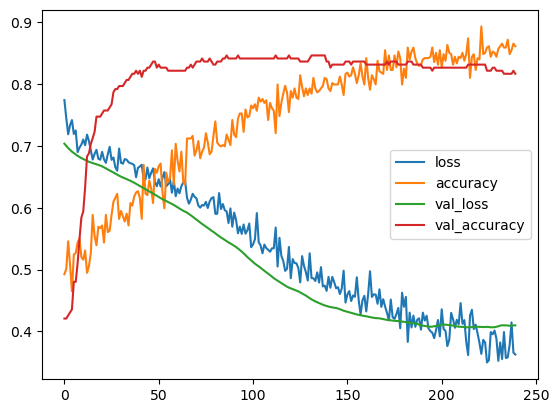

In [716]:
model_loss = pd.DataFrame(model.history.history).plot()
model_loss.plot()

In [717]:
predictions = model.predict(X_test)
predictions = predictions.reshape(-1)

7/7 [==============================] - 0s 601us/step


In [718]:
for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

In [719]:
compare_classes(y_test,predictions)

Accuracy = 0.82


(Predicted  0.0  1.0
 Actual             
 0          103   14
 1           23   62,
 0.8168316831683168)

In [728]:
print("score on train:", model.evaluate(X_train,y_train)[1])
print("score on test:", model.evaluate(X_test,y_test)[1])

15/15 [==============================] - 0s 558us/step - loss: 0.2615 - accuracy: 0.9168
score on train: 0.916844367980957
7/7 [==============================] - 0s 487us/step - loss: 0.4098 - accuracy: 0.8168
score on test: 0.8168317079544067


In [740]:
classification_model = ['Random Forest','KNN','Naive-Bayes','SVM','Neural Network']
column = ['Algorithm','Train','Test']
classification_rows = [['Random Forest',0.9133960440622495,0.865891132572432],
                      ['KNN',0.8226530152768168,0.8331650570676032],
                      ['Naive-Bayes',0.6749461851888461,0.6766022827041265],
                       ['SVM',0.8837567131231261,0.8733757682177348],
                       ['Neural Network',0.916844367980957,0.8168317079544067]]

In [744]:
final_result = pd.DataFrame(classification_rows,columns=column)

In [746]:
final_result['OF'] = final_result['Train'] - final_result['Test']

In [751]:
final_result.sort_values('Test',ascending=False)

,Algorithm,Train,Test,OF
3,SVM,0.883757,0.873376,0.010381
0,Random Forest,0.913396,0.865891,0.047505
1,KNN,0.822653,0.833165,-0.010512
4,Neural Network,0.916844,0.816832,0.100013
2,Naive-Bayes,0.674946,0.676602,-0.001656


## Conclusion: Linear SVM performs best with about 87% accuracy without much overfitting.